## Clone Multimodal SDK Repo

In [ ]:
!git clone https://github.com/A2Zadeh/CMU-MultimodalSDK.git

fatal: destination path 'CMU-MultimodalSDK' already exists and is not an empty directory.


In [ ]:
%set_env PYTHONPATH=/Users/main/Documents/repos/audioNN/CMU-MultimodalSDK

env: PYTHONPATH=/Users/main/Documents/repos/audioNN/CMU-MultimodalSDK


In [ ]:
import sys
sys.path.insert(1, "/Users/main/Documents/repos/audioNN/CMU-MultimodalSDK")

In [ ]:
!pip install h5py validators tqdm numpy argparse requests colorama

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import colorama
import mmsdk
from mmsdk import mmdatasdk

# Find all computional sequences in the repository

In [ ]:
import os
from os import listdir
from os.path import isfile, join

# Path to csd files. If path is incorrect or missing the entire dataset will be downloaded
pathf = './downloaded_dataset'
dataset_dictionary={}


# choice={"cmu_mosei":mmdatasdk.cmu_mosei.highlevel,"cmu_mosi":mmdatasdk.cmu_mosi.highlevel,"pom":mmdatasdk.pom.highlevel}
# labels={"cmu_mosei":mmdatasdk.cmu_mosei.labels,"cmu_mosi":mmdatasdk.cmu_mosi.labels,"pom":mmdatasdk.pom.labels}
##ONLY RUN IF DATASET IS NOT PREVIOUSLY ALIGNED
if os.path.isdir(pathf) is False:
    dataset=mmdatasdk.mmdataset(mmdatasdk.cmu_mosei.highlevel,pathf)
    dataset.add_computational_sequences(mmdatasdk.cmu_mosei.labels,pathf)
else: 
    ##RUN IF DATASET IS PREVIOUSLY ALIGNED aka downloaded previously
    csdfiles = [f for f in listdir(pathf) if isfile(join(pathf, f)) and f[-4:]=='.csd']
    if len(csdfiles)==0:
        print("No csd files in the given folder")
        exit(-2)

    print("%d csd files found"%len(csdfiles))
    for csdfile in csdfiles:
        dataset_dictionary[csdfile]=os.path.join(pathf,csdfile)
    dataset=mmdatasdk.mmdataset(dataset_dictionary)

5 csd files found
[2022-04-25 20:40:36.222] | Success | Computational sequence read from file ./downloaded_dataset/CMU_MOSEI_TimestampedWordVectors.csd ...
[2022-04-25 20:40:36.699] | Status  | Checking the integrity of the <glove_vectors> computational sequence ...
[2022-04-25 20:40:36.699] | Status  | Checking the format of the data in <glove_vectors> computational sequence ...


[2022-04-25 20:40:39.066] | Success | <glove_vectors> computational sequence data in correct format.
[2022-04-25 20:40:39.066] | Status  | Checking the format of the metadata in <glove_vectors> computational sequence ...
[2022-04-25 20:40:39.066] | Warning | <glove_vectors> computational sequence does not have all the required metadata ... continuing 
[2022-04-25 20:40:39.067] | Success | Computational sequence read from file ./downloaded_dataset/CMU_MOSEI_COVAREP.csd ...
[2022-04-25 20:40:39.499] | Status  | Checking the integrity of the <COVAREP> computational sequence ...
[2022-04-25 20:40:39.499] | Status  | Checking the format of the data in <COVAREP> computational sequence ...


[2022-04-25 20:40:42.051] | Success | <COVAREP> computational sequence data in correct format.
[2022-04-25 20:40:42.051] | Status  | Checking the format of the metadata in <COVAREP> computational sequence ...
[2022-04-25 20:40:42.051] | Warning | <COVAREP> computational sequence does not have all the required metadata ... continuing 
[2022-04-25 20:40:42.051] | Success | Computational sequence read from file ./downloaded_dataset/CMU_MOSEI_VisualOpenFace2.csd ...
[2022-04-25 20:40:42.446] | Status  | Checking the integrity of the <OpenFace_2> computational sequence ...
[2022-04-25 20:40:42.446] | Status  | Checking the format of the data in <OpenFace_2> computational sequence ...


[2022-04-25 20:40:44.956] | Success | <OpenFace_2> computational sequence data in correct format.
[2022-04-25 20:40:44.956] | Status  | Checking the format of the metadata in <OpenFace_2> computational sequence ...
[2022-04-25 20:40:44.956] | Warning | <OpenFace_2> computational sequence does not have all the required metadata ... continuing 
[2022-04-25 20:40:44.957] | Success | Computational sequence read from file ./downloaded_dataset/CMU_MOSEI_VisualFacet42.csd ...
[2022-04-25 20:40:45.547] | Status  | Checking the integrity of the <FACET 4.2> computational sequence ...
[2022-04-25 20:40:45.547] | Status  | Checking the format of the data in <FACET 4.2> computational sequence ...


[2022-04-25 20:40:48.261] | Success | <FACET 4.2> computational sequence data in correct format.
[2022-04-25 20:40:48.261] | Status  | Checking the format of the metadata in <FACET 4.2> computational sequence ...
[2022-04-25 20:40:48.261] | Warning | <FACET 4.2> computational sequence does not have all the required metadata ... continuing 
[2022-04-25 20:40:48.262] | Success | Computational sequence read from file ./downloaded_dataset/CMU_MOSEI_Labels.csd ...
[2022-04-25 20:40:48.516] | Status  | Checking the integrity of the <All Labels> computational sequence ...
[2022-04-25 20:40:48.516] | Status  | Checking the format of the data in <All Labels> computational sequence ...


[2022-04-25 20:40:50.247] | Success | <All Labels> computational sequence data in correct format.
[2022-04-25 20:40:50.247] | Status  | Checking the format of the metadata in <All Labels> computational sequence ...
[2022-04-25 20:40:50.247] | Warning | <All Labels> computational sequence does not have all the required metadata ... continuing 
[2022-04-25 20:40:50.247] | Success | Dataset initialized successfully ... 


Get the ids for the data splits

In [ ]:
train_split = mmdatasdk.cmu_mosei.standard_folds.standard_train_fold
dev_split = mmdatasdk.cmu_mosei.standard_folds.standard_valid_fold
test_split = mmdatasdk.cmu_mosei.standard_folds.standard_test_fold

In [ ]:
print ("List of the computational sequences in the downloaded dataset")
print (dataset.computational_sequences.keys())

List of the computational sequences in the downloaded dataset
dict_keys(['CMU_MOSEI_TimestampedWordVectors.csd', 'CMU_MOSEI_COVAREP.csd', 'CMU_MOSEI_VisualOpenFace2.csd', 'CMU_MOSEI_VisualFacet42.csd', 'CMU_MOSEI_Labels.csd'])


In [ ]:
dataset.computational_sequences['CMU_MOSEI_TimestampedWordVectors.csd']['-3g5yACwYnA']['features'][50]

array([ 8.7982e-03,  2.8731e-01, -6.1526e-01, -3.5694e-01,  1.8977e-01,
        2.3487e-01,  3.1982e-01, -7.9121e-02, -3.2447e-01,  2.3599e+00,
       -4.7748e-01,  4.6134e-02,  6.9496e-01, -1.8484e-01, -7.7504e-02,
        2.2559e-01,  4.7522e-02,  3.3704e-01, -1.2238e-01, -3.2800e-01,
        6.5003e-02,  2.2165e-01, -3.3592e-01,  4.4698e-01, -3.8576e-02,
       -5.0441e-02, -1.6209e-01, -3.5643e-02, -7.9561e-02, -3.9799e-01,
        2.7352e-01,  3.4264e-02,  3.5326e-01,  4.1972e-01, -1.5792e-01,
        2.1663e-01, -3.3070e-01,  1.8665e-01, -3.9424e-01, -8.5799e-02,
        2.4474e-01,  3.9804e-01, -1.0199e-01, -5.9201e-01,  2.3073e-01,
       -2.2358e-01, -1.5474e-01, -3.3788e-01, -2.6283e-01, -9.8721e-02,
       -1.8223e-01,  3.6109e-01,  2.7070e-02,  5.7290e-01,  1.7994e-01,
       -2.7817e-01, -5.2845e-02, -7.1350e-02, -2.1708e-01, -2.3401e-01,
        1.2194e-01,  1.5009e-01,  1.9745e-01,  3.3526e-01,  1.0456e-01,
       -2.6216e-01,  2.8393e-01,  2.4053e-01, -7.7442e-03,  8.91

Align labels and time sequences

In [ ]:
import pandas as pd
import numpy as np
# The following may require 'CMU_MOSEI_Labels.csd' or 'All Labels' depending on dataset.computational_sequences.keys()
compseq = 'CMU_MOSEI_Labels.csd'

files = []
starts = []
ends = []
sentiment = []
happy = []
sad = []
anger = []
surprise = []
disgust = []
fear = []
for file in dataset.computational_sequences[compseq].keys():
    for index in range(len(dataset.computational_sequences[compseq][file]['intervals'])):
        files += [file]
        starts += [dataset.computational_sequences[compseq][file]['intervals'][index][0]]
        ends += [dataset.computational_sequences[compseq][file]['intervals'][index][1]]
        # sentiment,happy,sad,anger,surprise,disgust,fear
        # dataset.computational_sequences['CMU_MOSEI_Labels.csd']['-3g5yACwYnA']['features'][index][0]
        sentiment += [dataset.computational_sequences[compseq][file]['features'][index][0]]
        happy += [dataset.computational_sequences[compseq][file]['features'][index][1]]
        sad += [dataset.computational_sequences[compseq][file]['features'][index][2]]
        anger += [dataset.computational_sequences[compseq][file]['features'][index][3]]
        surprise += [dataset.computational_sequences[compseq][file]['features'][index][4]]
        disgust += [dataset.computational_sequences[compseq][file]['features'][index][5]]
        fear += [dataset.computational_sequences[compseq][file]['features'][index][6]]
        
df_labels = pd.DataFrame(
    data=np.stack([
        files,
        starts,
        ends,
        sentiment,
        happy,
        sad,
        anger,
        surprise,
        disgust,
        fear
    ], axis=1),
    columns=[
        'file',
        'start',
        'end',
        'sentiment',
        'happy',
        'sad',
        'anger',
        'surprise',
        'disgust',
        'fear'
    ]
)

In [ ]:
df_labels

,file,start,end,sentiment,happy,sad,anger,surprise,disgust,fear
0,--qXJuDtHPw,23.199,30.325,1.0,0.6666667,0.0,0.0,0.0,0.0,0.0
1,-3g5yACwYnA,82.753,100.555,1.0,0.6666667,0.6666667,0.0,0.0,0.0,0.6666667
2,-3g5yACwYnA,119.919,125.299,0.6666667,0.0,0.0,0.0,0.0,0.0,0.0
3,-3g5yACwYnA,4.84,14.052,0.0,0.6666667,0.6666667,0.0,0.0,0.0,0.33333334
4,-3g5yACwYnA,13.211,27.521,0.0,0.33333334,0.33333334,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
23254,zwTrXwi54us,47.444,49.312,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23255,zwTrXwi54us,48.511,53.652,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23256,zwTrXwi54us,52.652,57.942,1.0,1.0,0.0,0.0,0.0,0.0,0.0
23257,zwTrXwi54us,57.98,69.326,0.6666667,0.33333334,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_labels.to_csv("/Users/main/Documents/repos/audioNN/audioLabels.csv")

In [ ]:
!git clone https://github.com/A2Zadeh/CMU-MultimodalSDK.git

In [ ]:
%set_env PYTHONPATH=C:\Users\User\Documents\repos\CMU-MultimodalSDK

env: PYTHONPATH=C:\Users\User\Documents\repos\CMU-MultimodalSDK


In [ ]:
import sys
sys.path.insert(1, "C:\\Users\\User\\Documents\\repos\\CMU-MultimodalSDK")

In [ ]:
# !pip install h5py validators tqdm numpy argparse requests colorama

In [ ]:
import colorama
import mmsdk
from mmsdk import mmdatasdk
import os
from os import listdir
from os.path import isfile, join

# Path to csd files. If path is incorrect or missing the entire dataset will be downloaded
pathf = 'C:\\Users\\User\\Documents\\repos\\downloaded_datasets'
dataset_dictionary={}


# choice={"cmu_mosei":mmdatasdk.cmu_mosei.highlevel,"cmu_mosi":mmdatasdk.cmu_mosi.highlevel,"pom":mmdatasdk.pom.highlevel}
# labels={"cmu_mosei":mmdatasdk.cmu_mosei.labels,"cmu_mosi":mmdatasdk.cmu_mosi.labels,"pom":mmdatasdk.pom.labels}
##ONLY RUN IF DATASET IS NOT PREVIOUSLY ALIGNED
if os.path.isdir(pathf) is False:
    dataset=mmdatasdk.mmdataset(mmdatasdk.cmu_mosei.highlevel,pathf)
    dataset.add_computational_sequences(mmdatasdk.cmu_mosei.labels,pathf)
else: 
    ##RUN IF DATASET IS PREVIOUSLY ALIGNED aka downloaded previously
    csdfiles = [f for f in listdir(pathf) if isfile(join(pathf, f)) and f[-4:]=='.csd']
    if len(csdfiles)==0:
        print("No csd files in the given folder")
        exit(-2)

    print("%d csd files found"%len(csdfiles))
    for csdfile in csdfiles:
        dataset_dictionary[csdfile]=os.path.join(pathf,csdfile)
    dataset=mmdatasdk.mmdataset(dataset_dictionary)

1 csd files found
[2022-04-26 22:07:43.455] | Success | Computational sequence read from file C:\Users\User\Documents\repos\downloaded_datasets\CMU_MOSEI_Labels.csd ...
[2022-04-26 22:07:44.172] | Status  | Checking the integrity of the <All Labels> computational sequence ...
[2022-04-26 22:07:44.172] | Status  | Checking the format of the data in <All Labels> computational sequence ...


[2022-04-26 22:07:46.109] | Success | <All Labels> computational sequence data in correct format.
[2022-04-26 22:07:46.128] | Status  | Checking the format of the metadata in <All Labels> computational sequence ...
[2022-04-26 22:07:46.128] | Warning | <All Labels> computational sequence does not have all the required metadata ... continuing 
[2022-04-26 22:07:46.129] | Success | Dataset initialized successfully ... 


In [ ]:
import pandas as pd

In [ ]:
import os

data_files = [(x[0], x[2]) for x in os.walk("C:\\Users\\User\\Documents\\repos\\WAV_16000")]
data_files = data_files[0][1]

In [ ]:
len(data_files)

3838

In [ ]:
fileids = []
for i in range(len(data_files)):
  fileids.append(data_files[i].strip('.wav'))

In [ ]:
import pandas as pd
labelData = pd.read_csv("C:\\Users\\User\\Documents\\repos\\audioLabels.csv")

In [ ]:
sampledf = labelData

In [ ]:
set1 = list(set(sampledf.file))


master = list(set(set1))
len(master)

3293

In [ ]:
len(fileids)

3838

In [ ]:
sampledf

,Unnamed: 0,file,start,end,sentiment,happy,sad,anger,surprise,disgust,fear
0,0,--qXJuDtHPw,23.199,30.325,1.000000,0.666667,0.000000,0.0,0.0,0.0,0.000000
1,1,-3g5yACwYnA,82.753,100.555,1.000000,0.666667,0.666667,0.0,0.0,0.0,0.666667
2,2,-3g5yACwYnA,119.919,125.299,0.666667,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,3,-3g5yACwYnA,4.840,14.052,0.000000,0.666667,0.666667,0.0,0.0,0.0,0.333333
4,4,-3g5yACwYnA,13.211,27.521,0.000000,0.333333,0.333333,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
23254,23254,zwTrXwi54us,47.444,49.312,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
23255,23255,zwTrXwi54us,48.511,53.652,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
23256,23256,zwTrXwi54us,52.652,57.942,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000
23257,23257,zwTrXwi54us,57.980,69.326,0.666667,0.333333,0.000000,0.0,0.0,0.0,0.000000


In [ ]:
from os.path import exists

# file_exists = exists(path_to_file)

## Create a function align the data, Compute the MFCCs, and export.

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
def pickleme(filels):
    numSamplesFFT = 2048
    hopLength = 512
    d = 0
    validfiles_temp = filels
    for i in validfiles_temp:
        labelData_temp = sampledf[sampledf.file == i].reset_index()
        d += 1
        if d % 50 == 0:
          print(d / len(validfiles_temp), end= " ")
        tempdir = 'C:\\Users\\User\\Documents\\repos\\WAV_16000\\' + str(i) + '.wav'
        temptextdir = 'C:\\Users\\User\\Documents\\repos\\Combined\\' + str(i) + '.txt'
        file_exists = exists(tempdir)
        file_exists_text = exists(temptextdir)
        if file_exists & file_exists_text:
            for j in range(len(labelData_temp)):
                text_df_temp = pd.read_csv(temptextdir, sep='___', header=None)
                text_df_temp = text_df_temp[text_df_temp[1] == j]
                text_temp = text_df_temp[4]
                signal_temp, sampleRate_temp = librosa.load(tempdir, sr=16000)
                start_t = float(labelData_temp.iloc[[j]].start)
                end_t = float(labelData_temp.iloc[[j]].end)
                if start_t < 0:
                  start_t = 0
                start_index = librosa.time_to_samples(start_t, sr=sampleRate_temp)
                end_index = librosa.time_to_samples(end_t, sr=sampleRate_temp)
                signal_temp_slice = signal_temp[int(start_index):int(end_index)]
                MFCC = librosa.feature.mfcc(signal_temp_slice, n_fft=numSamplesFFT, hop_length=hopLength, n_mfcc=128)
                MFCC = librosa.util.fix_length(MFCC, size=850)
                librosa.display.specshow(MFCC, sr=16000, hop_length=hopLength)
                plt.savefig('C:\\Users\\User\\Documents\\repos\\MFCCs\\' + str(i) + '-' + str(j))
                yield (str(i), j, signal_temp_slice, MFCC, str(text_temp),
                          float(labelData_temp.iloc[[j]].sentiment), 
                          float(labelData_temp.iloc[[j]].happy), 
                          float(labelData_temp.iloc[[j]].sad), 
                          float(labelData_temp.iloc[[j]].anger), 
                          float(labelData_temp.iloc[[j]].surprise), 
                          float(labelData_temp.iloc[[j]].disgust), 
                          float(labelData_temp.iloc[[j]].fear))

### Save all files to pickle files for each example in the data splits

In [ ]:
# obtain the train/dev/test splits - these splits are based on video IDs
train_split = mmdatasdk.cmu_mosei.standard_folds.standard_train_fold
dev_split = mmdatasdk.cmu_mosei.standard_folds.standard_valid_fold
test_split = mmdatasdk.cmu_mosei.standard_folds.standard_test_fold


In [ ]:
import sys
import warnings
warnings.filterwarnings("ignore")

train_split_data = pickleme(train_split)
dev_split_data = pickleme(dev_split)
test_split_data = pickleme(test_split)

In [ ]:
import pickle
obj = []
file_path = 'audioDataTrain.pickle'
pickle_out = open(file_path,"wb")
pickle.dump(obj, pickle_out)
pickle_out.close()
for i in train_split_data:
    file = open(file_path, 'rb')
    old_data = pickle.load(file) 
    old_data += i
    with open(file_path, 'ab+') as fp:
        pickle.dump(old_data, fp)
        fp.close()

0.02501250625312656 0.05002501250625312 

In [ ]:
import pickle
obj = []
file_path = 'audioDataDevLabels.pickle'
pickle_out = open(file_path, "wb")
pickle.dump(obj, pickle_out)
pickle_out.close()
for i in dev_split_data:
    file = open(file_path, 'rb')
    old_data = pickle.load(file) 
    old_data += i
    with open(file_path, 'ab+') as fp:
        pickle.dump(old_data, fp)
        fp.close()

0.16666666666666666 0.3333333333333333 0.5 0.6666666666666666 0.8333333333333334 1.0 

In [ ]:
obj = []
file_path = 'audioDataTestLabels.pickle'
pickle_out = open(file_path,"wb")
pickle.dump(obj, pickle_out)
pickle_out.close()
for i in test_split_data:
    file = open(file_path, 'rb')
    old_data = pickle.load(file) 
    old_data += i
    with open(file_path, 'ab+') as fp:
        pickle.dump(old_data, fp)
        fp.close()

0.07374631268436578 0.14749262536873156 0.22123893805309736 0.2949852507374631 0.3687315634218289 0.4424778761061947 0.5162241887905604 0.5899705014749262 0.6637168141592921 0.7374631268436578 0.8112094395280236 0.8849557522123894 0.9587020648967551 

In [ ]:
file_path = 'audioDataTest.pickle'
pickle_out = open(file_path,"rb")
pickle_out.close()

In [ ]:
objects = []
file_name = "audioDataDev.pickle"

with (open(file_name, "rb")) as f:
    while True:
        try:
            objects.append(pickle.load(f))
        except EOFError:
            break
f.close()

In [ ]:
# Gives the audio id key for the 1000th sample
objects[1000][1]

(13, 850)

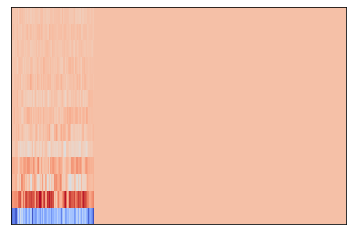

In [ ]:
hopLength = 512

librosa.display.specshow(objects[10000][14], sr=16000, hop_length=hopLength)